In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from skimage.morphology import label
from scipy.ndimage import measurements

from z3 import *
from IPython.display import Markdown, display,Image

### Archive
Intro
Current Puzzle
Archive
Some F Squares
January 2024 : Puzzle
Show Solution

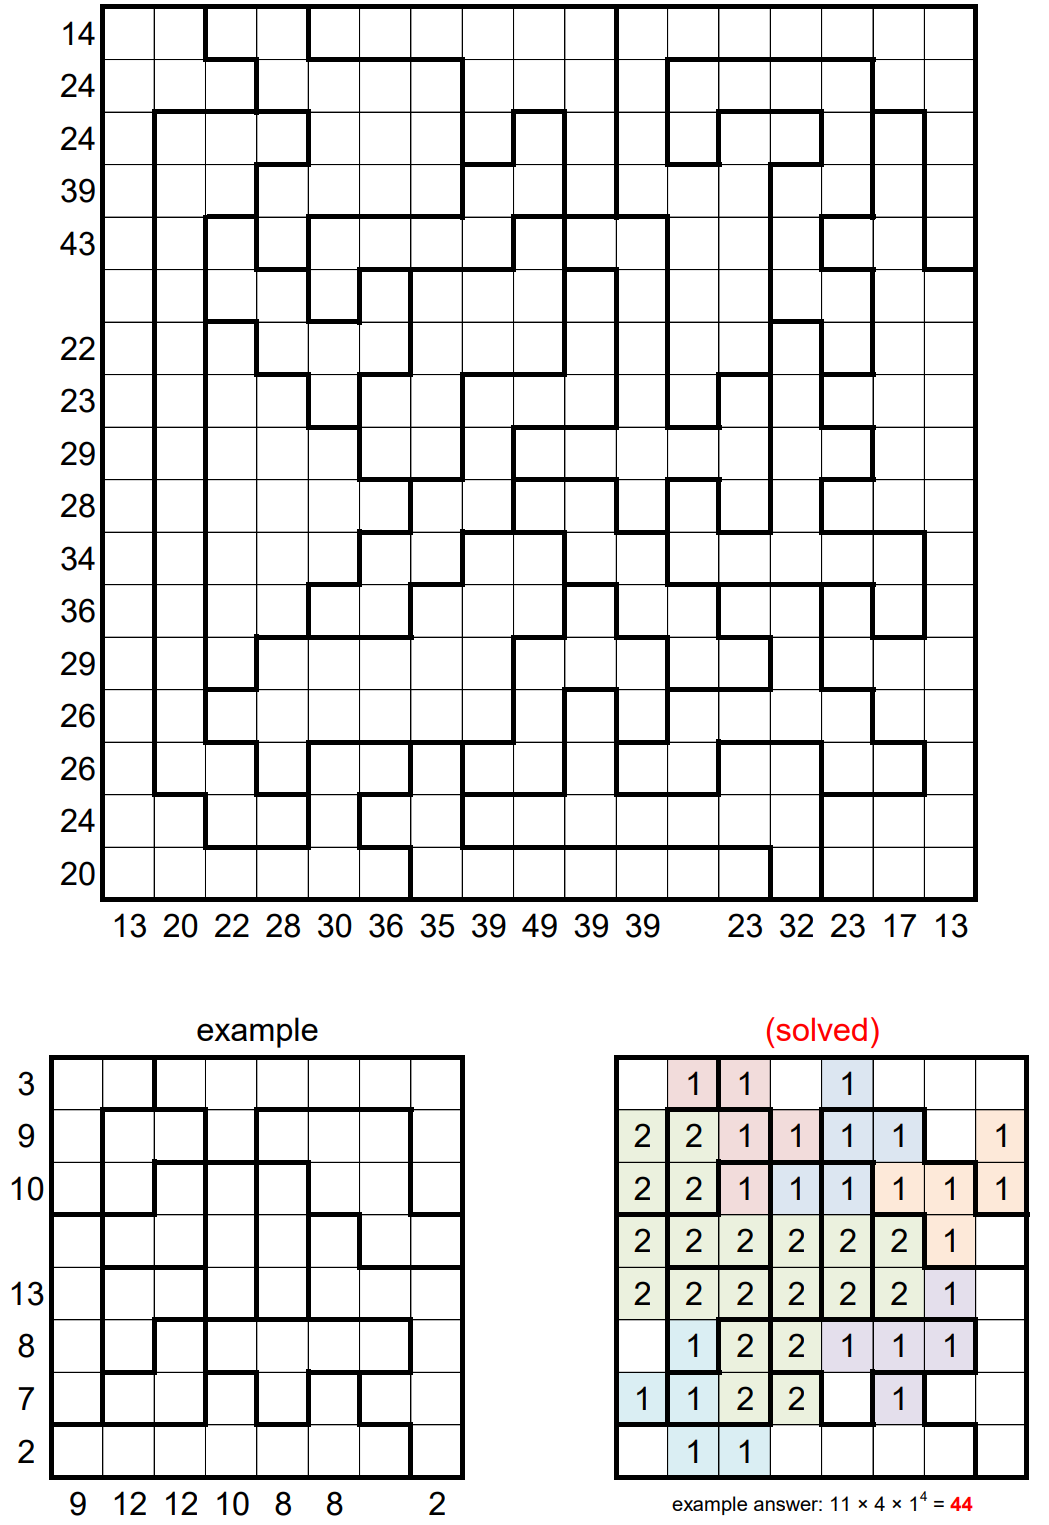

In [2]:
url='https://www.janestreet.com/puzzles/some-f-squares-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text.replace(">","greater than") for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n"+"\n".join(y[10:16])))
display(Image('https://www.janestreet.com/puzzles/some_f_squares.png',width=400))

In [3]:
# Set up the regions and fixed cells

small=np.array([[ 0, 0, 1, 1, 1, 1, 1, 1],
                [ 0, 2, 2, 1, 3, 3, 3, 1],
                [ 0, 2, 4, 5, 6, 3, 3, 1],
                [ 7, 4, 4, 5, 6, 8, 3, 3],
                [ 7, 9, 9, 5, 6, 8, 8, 8],
                [ 7, 9,10,11,11,11,11, 8],
                [ 7,10,10,12,11,12, 8, 8],
                [12,12,12,12,12,12,12, 8]])

small_soln = np.array([[0, 1, 1, 0, 1, 0, 0, 0],
                       [2, 2, 1, 1, 1, 1, 0, 1],
                       [2, 2, 1, 1, 1, 1, 1, 1],
                       [2, 2, 2, 2, 2, 2, 1, 0],
                       [2, 2, 2, 2, 2, 2, 1, 0],
                       [0, 1, 2, 2, 1, 1, 1, 0],
                       [1, 1, 2, 2, 0, 0, 0, 0],
                       [0, 1, 1, 0, 0, 0, 0, 0]])

small_fixed = np.zeros((8,8),dtype=int)

small_rows = [3,9,10,0,13,8,7,2]
small_cols = [9,12,12,10,8,8,0,2]

In [4]:
# print in a nice format and calc the answer
def output(regions,fixed,cols,rows):
    N=regions.shape[0]
    fig,ax = plt.subplots(1,1,figsize=(N/2.5,N/2.5))    
    x = np.array((fixed).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax =sns.heatmap(regions,annot=x,cbar=False,cmap='tab20',fmt="",
                    linewidths=1,linecolor="k",annot_kws={"size":N**0.5*3,"color":"k"},
                    xticklabels=cols, yticklabels=rows)
    ax.tick_params(left=False, bottom=False,labelleft=True, labelright=False,labeltop=False,labelbottom=True)
    plt.xticks(rotation=0,fontsize =N**0.5*4)
    plt.yticks(rotation=0,fontsize =N**0.5*4)
    plt.tight_layout()
    plt.show()
    
# Good old solution code     
def areas(grid):
    labels, num = measurements.label(np.logical_not(grid!=0))
    areas = measurements.sum(np.logical_not(grid!=0), labels, index=range(1, num+1))
    print("areas are",areas)
    return np.prod(areas)

#build the F as a grid
def create_f(n):
    num = np.ones((n,n),dtype=int)*n
    zero = np.zeros((n,n),dtype=int)
    return np.block([[num,num,zero],
                     [zero,num,num],
                     [zero,num,zero]])


In [5]:
large_fixed = np.zeros((17,17),dtype=int)

large_rows = [14,24,24,39,43,0,22,23,29,28,34,36,29,26,26,24,20]
large_cols = [13,20,22,28,30,36,35,39,49,39,39,0,23,32,23,17,13]

large =  np.array([[ 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
                   [ 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 3, 3],
                   [ 0, 5, 5, 5, 1, 1, 1, 2, 6, 2, 3, 4, 3, 3, 4, 7, 3],
                   [ 0, 5, 5, 1, 1, 1, 1, 6, 6, 2, 3, 3, 3, 4, 4, 7, 3],
                   [ 0, 5, 8, 1, 6, 6, 6, 6, 9,10,10, 3, 3, 4, 7, 7, 3],
                   [ 0, 5, 8, 8, 6, 8, 9, 9, 9,11,10, 3, 3, 4, 4, 7, 7],
                   [ 0, 5,12, 8, 8, 8, 9, 9, 9,11,10, 3, 3,13, 4, 7, 7],
                   [ 0, 5,12,12, 8, 9, 9,11,11,11,10, 3,10,13, 7, 7, 7],
                   [ 0, 5,12,12,12, 9, 9,11,10,10,10,10,10,13,13, 7, 7],
                   [ 0, 5,12,12,12,12,11,11,14,14,10,13,10,13, 7, 7, 7],
                   [ 0, 5,12,12,12,11,11,15,15,14,14,13,13,13,13,13, 7],
                   [ 0, 5,12,12,11,11,15,15,15,16,14,14,17,17, 7,13, 7],
                   [ 0, 5,12,15,15,15,15,15,16,16,16,14,14,17, 7, 7, 7],
                   [ 0, 5,15,15,15,15,15,15,16,18,16,17,17,17,17, 7, 7],
                   [ 0, 5, 5,15, 0, 0,19,16,16,18,17,17,18,18,17,17, 7],
                   [ 0, 0, 5, 5, 0,19,19,18,18,18,18,18,18,18, 7, 7, 7],
                   [ 0, 0, 0, 0, 0, 0,19,19,19,19,19,19,19,18, 7, 7, 7]])

#output(large,large_fixed,large_cols,large_rows)

In [6]:
def fill(regions,fixed,row_tot,col_tot,max_score=3,tactic='qffd'):
    start = time.time()
    
    # Parameters of the grid
    N= regions.shape[0]
    R =np.max(regions)
        
    #set up the variables    
    scores = np.array(IntVector('scores', N*N),dtype=object).reshape((N,N))
    region_tot =  Int('tot')
    
    # Tactic and bounds
    s = Tactic(tactic).solver()
    s += [ And(e >= 0  ,e <= max_score) for (i,j),e in np.ndenumerate(scores)]
    s += And(region_tot >=0,region_tot <=8*max_score)
    
    # fixed cells for testing
    s += [scores[i,j] == int(e) for (i,j),e in np.ndenumerate(fixed) if e !=0]
    
    #region totals
    s += [Sum([e for (i,j),e in np.ndenumerate(scores) if regions[i,j]==n])==region_tot for n in range(R+1)]
    
    #rows and columns
    s += [Sum([i for i in scores[e,:]]) == v for e,v in enumerate(row_tot) if v !=0]
    s += [Sum([i for i in scores[:,e]]) == v for e,v in enumerate(col_tot) if v !=0]
    
    # count of each score matches the size of the F's
    s+= [Sum([If(e==n,1,0) for (i,j),e in np.ndenumerate(scores)])% (5*n*n)==0 for n in range(1,max_score+1)]
    
    # Enforce the shapes of the F's
    for size in range(1,max_score +1 ):     
        options = []
        for r in range(4):
            for f in [create_f(size),np.fliplr(create_f(size))]:
                f = np.rot90(f,r)

                for (i,j),e in np.ndenumerate(f):
                    if e !=0 :
                        coords = []
                        for (x,y),n in np.ndenumerate(f):
                            if n != 0:
                                if (x-i,y-j) != (0,0):
                                    coords += [(x-i,y-j)]
                        options += [coords]

        for (i,j),e in np.ndenumerate(scores):
            s += Implies(e==size,Or([And([scores[i+x,y+j]==size for x,y in opt]) 
                                     for opt in options 
                                     if np.all([(i+x >=0) & (i+x <N) & (j+y >=0) &(j+y <N) for x,y in opt])
                                    ])
                        )
    print("setup took {:.4f} seconds".format(time.time()-start))
    start = time.time()
    if s.check() == sat:
        m = s.model()
        eval = np.vectorize(lambda x:m.evaluate(x).as_long())
        result =  eval(scores)
        output(regions,result,col_tot,row_tot)
        print("Took {:.4f} seconds".format(time.time()-start))
        print("region totals are",eval(region_tot))
        s+=Or ([scores[i,j] !=int(e) for (i,j),e in np.ndenumerate(result)])
        if s.check == sat:
            print("not unique")
        else:
            print("unique")        
        
        return result
    else:
        print("failed in {:.4f} seconds".format(time.time()-start))
            

setup took 98.6256 seconds


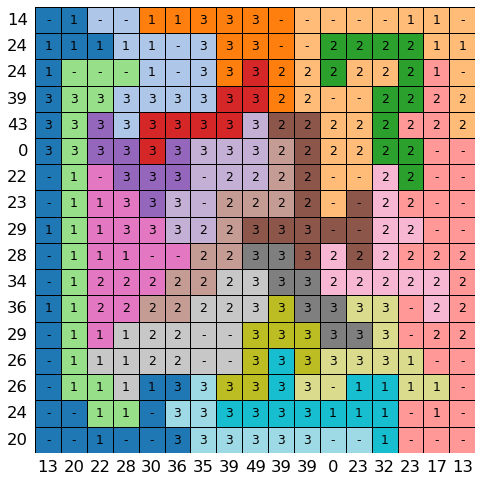

Took 12.1576 seconds
region totals are 24
unique
areas are [1. 2. 7. 1. 2. 3. 1. 2. 8. 2. 1. 2. 6. 2. 2. 2. 7. 4. 8. 1. 3. 2.]
rows [14 24 24 39 43 39 22 23 29 28 34 36 29 26 26 24 20] 
cols[13 20 22 28 30 36 35 39 49 39 39 22 23 32 23 17 13] 
soln 346,816,512


In [7]:
out =fill(large,large_fixed,large_rows,large_cols,max_score=3,tactic='qflia')
print("rows {} \ncols{} \nsoln {:,.0f}".format(np.sum(out,axis=1),np.sum(out,axis=0),areas(out!=0)))

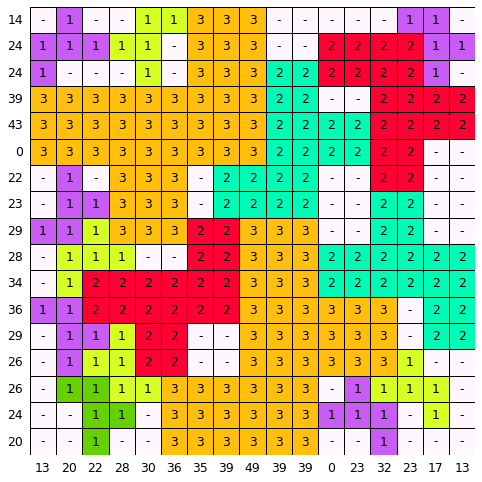

In [8]:
shade =  np.array([[0, 1, 0, 0, 4, 4, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0],
                   [1, 1, 1, 4, 4, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 1, 1],
                   [1, 0, 0, 0, 4, 0, 3, 3, 3, 6, 6, 2, 2, 2, 2, 1, 0],
                   [3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 0, 0, 2, 2, 2, 2],
                   [3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 2, 2, 2, 2],
                   [3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 2, 2, 0, 0],
                   [0, 1, 0, 3, 3, 3, 0, 6, 6, 6, 6, 0, 0, 2, 2, 0, 0],
                   [0, 1, 1, 3, 3, 3, 0, 6, 6, 6, 6, 0, 0, 6, 6, 0, 0],
                   [1, 1, 4, 3, 3, 3, 2, 2, 3, 3, 3, 0, 0, 6, 6, 0, 0],
                   [0, 4, 4, 4, 0, 0, 2, 2, 3, 3, 3, 6, 6, 6, 6, 6, 6],
                   [0, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 6, 6, 6, 6, 6, 6],
                   [1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 6, 6],
                   [0, 1, 1, 4, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 0, 6, 6],
                   [0, 1, 4, 4, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 4, 0, 0],
                   [0, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 0, 1, 4, 4, 4, 0],
                   [0, 0, 5, 5, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 4, 0],
                   [0, 0, 5, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0]])
N =17
fig,ax = plt.subplots(1,1,figsize=(N/2.5,N/2.5))    
x = np.array((out).astype('int').astype('str'))
x[x=="0"] ="-"
ax =sns.heatmap(shade,annot=x,cbar=False,cmap='gist_ncar_r',vmax=8,fmt="",
                linewidths=1,linecolor="k",annot_kws={"size":N**0.5*3,"color":"k"},
                xticklabels=large_cols, yticklabels=large_rows)
ax.tick_params(left=False, bottom=False,labelleft=True, labelright=False,labeltop=False,labelbottom=True)
plt.xticks(rotation=0,fontsize =N**0.5*3)
plt.yticks(rotation=0,fontsize =N**0.5*3)
plt.tight_layout()
plt.show()

setup took 2.3587 seconds


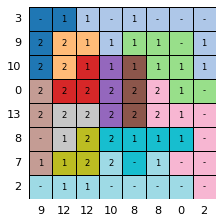

Took 0.3571 seconds
region totals are 5
unique
areas are [ 1.  1.  4. 11.  1.  1.]
rows [ 3  9 10 13 13  8  7  2]
cols[ 9 12 12 10  8  8  4  2]
soln 44.0


In [9]:
out2 =fill(small,small_fixed,small_rows,small_cols,tactic="default")
print("rows {}\ncols{}\nsoln {}".format(np.sum(out2,axis=1),np.sum(out2,axis=0),areas(out2!=0)))

### Some F Squares
For this, our 10th anniversary puzzle
1
, solvers were tasked with
smooshing F-pentominos of various sizes into an empty grid. The unique
arranement that satisfies the row-, column- and region-sum constraints
is shown above. The product of the areas of the leftover regions is
346,816,512
.
Congrates to this month’s solvers!

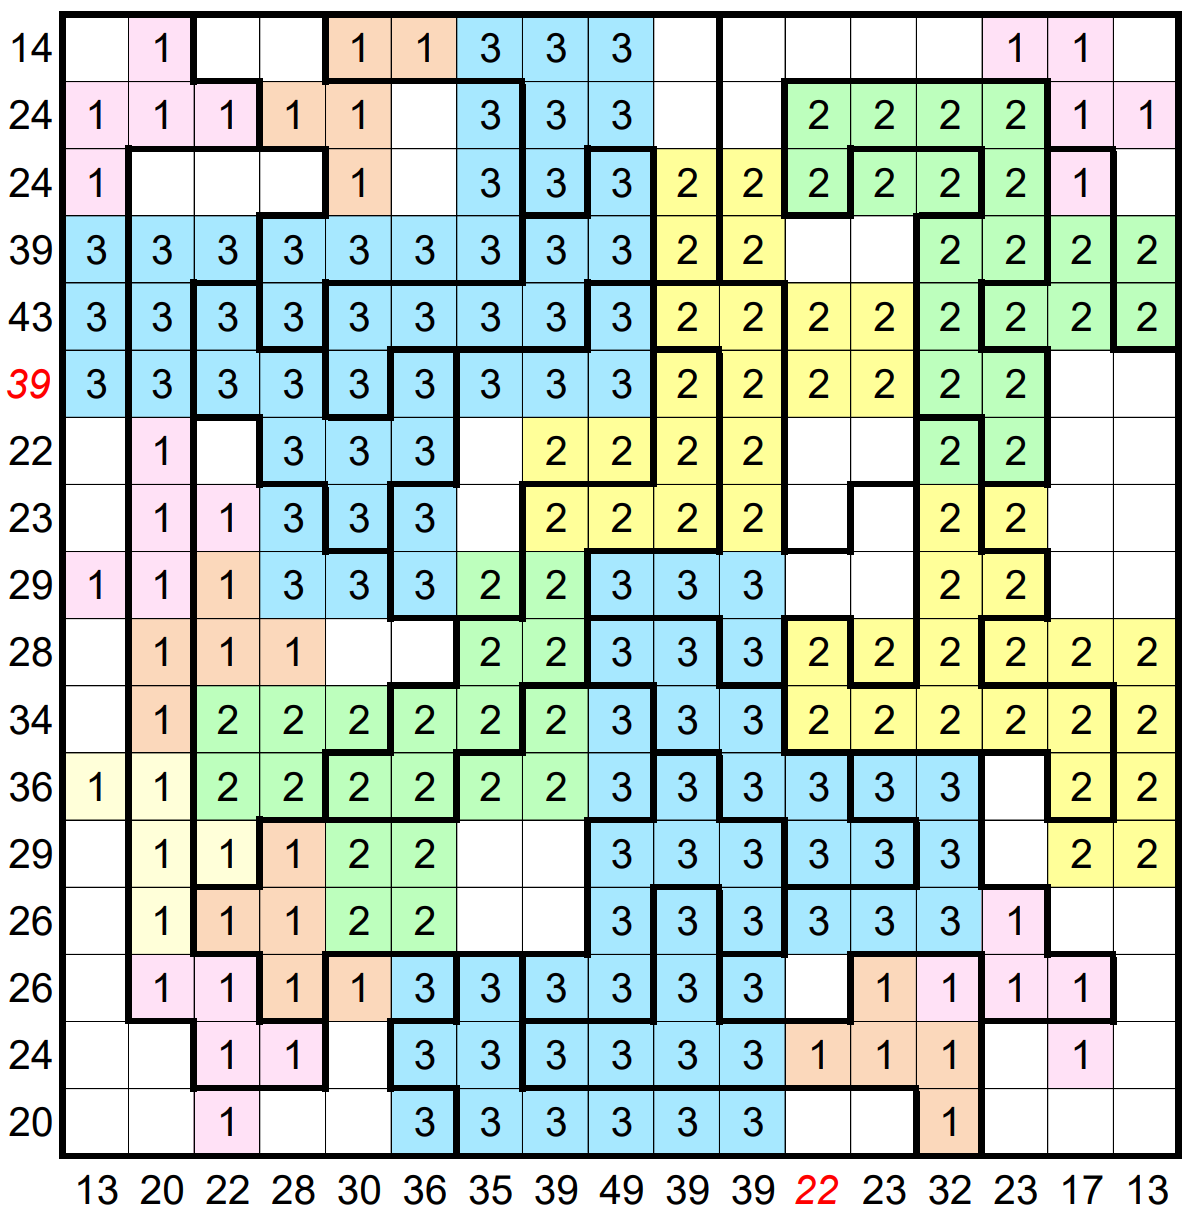

In [12]:
url='https://www.janestreet.com/puzzles/some-f-squares-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[13]+"\n"+"\n".join(y[16:22])))
display(Image('https://www.janestreet.com/puzzles/some_f_squares_solution.png',width=400))